# 1. Importing Libraries and load the dataset

In [1]:
# First, we'll import pandas, numpy a data processing and CSV file I/O library
import pandas as pd
import numpy as np 
# We'll also import seaborn, a Python graphing library
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# Next, we'll load the dataset
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# 2. Getting the overview of data

In [3]:
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [4]:
df.shape

(20491, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### 3. Perform EDA

In [6]:
df.describe() #To get Descriptive statistics of data

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
df.isnull().sum() #checking for the null values

Review    0
Rating    0
dtype: int64

This dataset has no null values

<AxesSubplot:xlabel='Rating'>

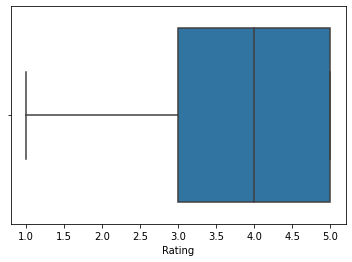

In [8]:
sns.boxplot(x = df['Rating']) #checking for outliers

There are no outliers present in the dataset

<AxesSubplot:xlabel='Rating', ylabel='count'>

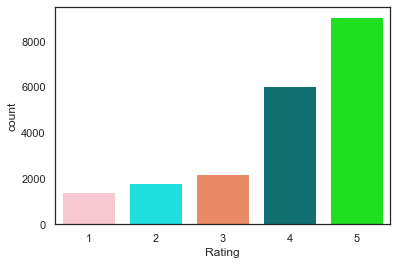

In [9]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = df['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime']) 

Hence,1 has the lowest number of count and 5 has highest number of counts among 5 classification of Rating.

In [10]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))

In [11]:
df.head(10)

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191
5,love monaco staff husband stayed hotel crazy w...,5,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,101
7,"excellent staff, housekeeping quality hotel ch...",4,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59
9,excellent stayed hotel monaco past w/e delight...,5,35


<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

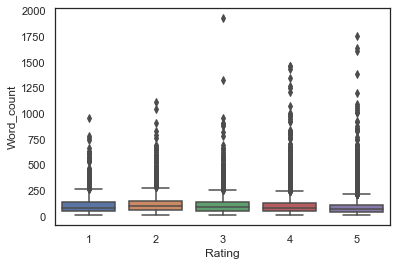

In [12]:
sns.boxplot(x = 'Rating', y='Word_count', data=df)

<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

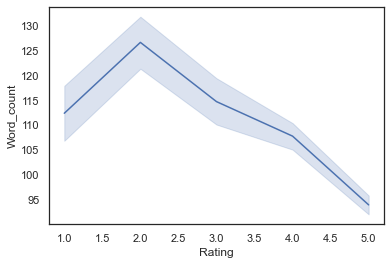

In [13]:
sns.lineplot(x='Rating', y='Word_count', data=df)

Hence, The review Rated as 3 has the highest number of word counts then others.

# 4.Sentiment Analysis

In [14]:
from textblob import TextBlob #import the textblob library

In [15]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [16]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [17]:
df['polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)

In [18]:
df.head(10)

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396
5,love monaco staff husband stayed hotel crazy w...,5,134,0.243056,0.614583
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,0.366661,0.631890
7,"excellent staff, housekeeping quality hotel ch...",4,85,0.562963,0.788889
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59,0.312946,0.576786
9,excellent stayed hotel monaco past w/e delight...,5,35,0.286355,0.534066


In [19]:
conditions = [
    (df['polarity']>0),
    (df['polarity']<0),
    (df['polarity']==0)
]
values = ['Positive','Negative','Nuetral']
df['polarity_new'] = np.select(conditions,values) #distribute 

In [20]:
df.head(10)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive
5,love monaco staff husband stayed hotel crazy w...,5,134,0.243056,0.614583,Positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,0.366661,0.631890,Positive
7,"excellent staff, housekeeping quality hotel ch...",4,85,0.562963,0.788889,Positive
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59,0.312946,0.576786,Positive
9,excellent stayed hotel monaco past w/e delight...,5,35,0.286355,0.534066,Positive


<AxesSubplot:xlabel='polarity', ylabel='Density'>

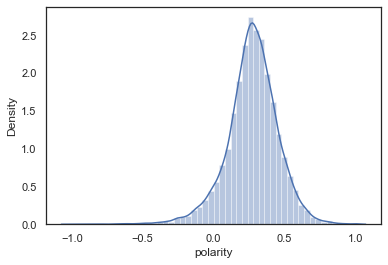

In [21]:
sns.distplot(df['polarity'])

<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

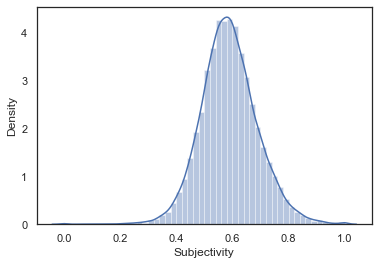

In [22]:
sns.distplot(df['Subjectivity'])

<AxesSubplot:xlabel='polarity_new', ylabel='count'>

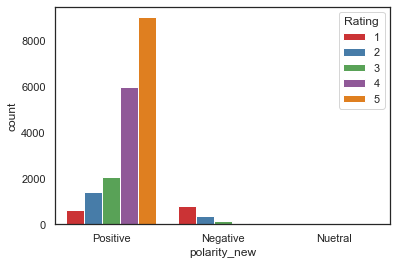

In [23]:
sns.countplot(x='polarity_new',hue='Rating',data=df, palette="Set1")

<AxesSubplot:xlabel='Rating', ylabel='polarity'>

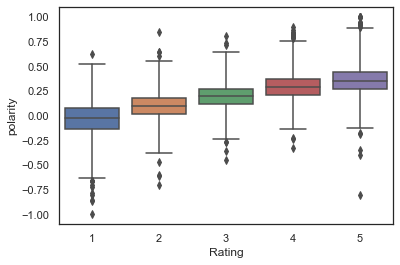

In [24]:
sns.boxplot(x='Rating',y='polarity', data=df, whis=2.5, fliersize= 5)

<AxesSubplot:xlabel='Rating', ylabel='Subjectivity'>

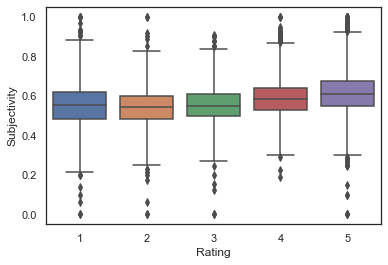

In [25]:
sns.boxplot(x='Rating',y='Subjectivity', data=df, whis=2)

# 5.Text Cleaning(Pre-processing of data)

A. Remove StopWords

In [26]:
#import libraries stopwords from nltk
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

In [27]:
#remove stopwords from review column
df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
df.head(10)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms 4* experience hotel monaco seattle ...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive
5,love monaco staff husband stayed hotel crazy w...,5,134,0.243056,0.614583,Positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,0.366661,0.631890,Positive
7,"excellent staff, housekeeping quality hotel ch...",4,85,0.562963,0.788889,Positive
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59,0.312946,0.576786,Positive
9,excellent stayed hotel monaco past w/e delight...,5,35,0.286355,0.534066,Positive


B.Stemming

In [29]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [30]:
# Split the sentences to lists of words.
df['Review_stemming'] = df['Review'].str.split()
# Make sure we see the full column.
pd.set_option('display.max_colwidth', -1)
df['Review_stemming'] = df['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [31]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, ect, desk, clerk, told, oh, mix, suit, descript, kimpton, websit, sorri, free, breakfast,, got, kidding,, embassi, suit, sit, room, bathroom, bedroom, unlik, kimpton, call, suite,, 5, day, stay, offer, correct, fals, advertising,, send, kimpton, prefer, guest, websit, email, ask, failur, provid, suit, advertis, websit, reserv, descript, furnish, hard, copi, reserv, printout, websit, desk, manag, duti, repli, solution,, send, email, trip, guest, survey, follow, ...]"
2,"nice rooms 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, n't provide guidance special 

C. Lemmatization

In [32]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Review_lemmatize'] = df.Review.apply(lemmatize_text)

In [33]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]","[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, review, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway,, maybe, noisy, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, pay, 40, parking, night,]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, ect, desk, clerk, told, oh, mix, suit, descript, kimpton, websit, sorri, free, breakfast,, got, kidding,, embassi, suit, si

In [34]:
import re
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [35]:
make_sentences(df,'Review_stemming')
make_sentences(df,'Review_lemmatize')

In [36]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printou

D. Word Cloud

In [37]:
rev_stemming = " ".join([review for review in df['Review_stemming']])
rev_stemming[:2000]

'nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,  ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit 

In [38]:
rev_lmtz = " ".join([review for review in df['Review_lemmatize']])
rev_lmtz[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,  ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast, got kidding, embassy suit sitting room bathroom bedroom unlike kimpton call suite, 5 day stay offer

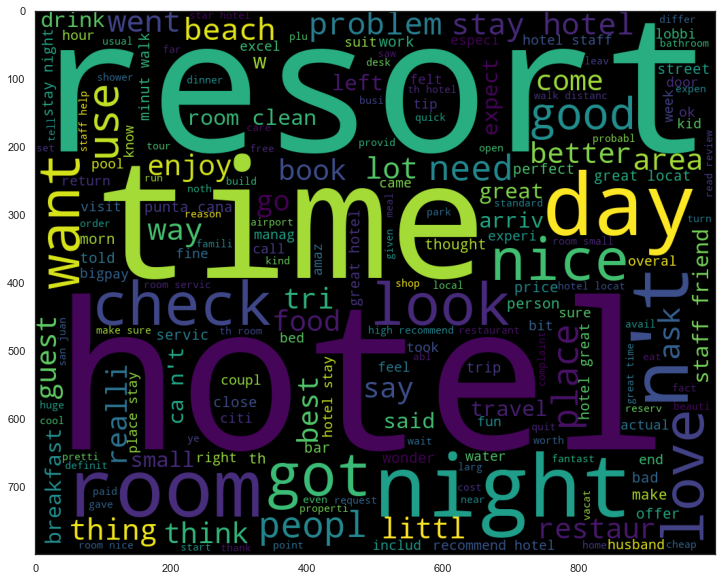

In [39]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

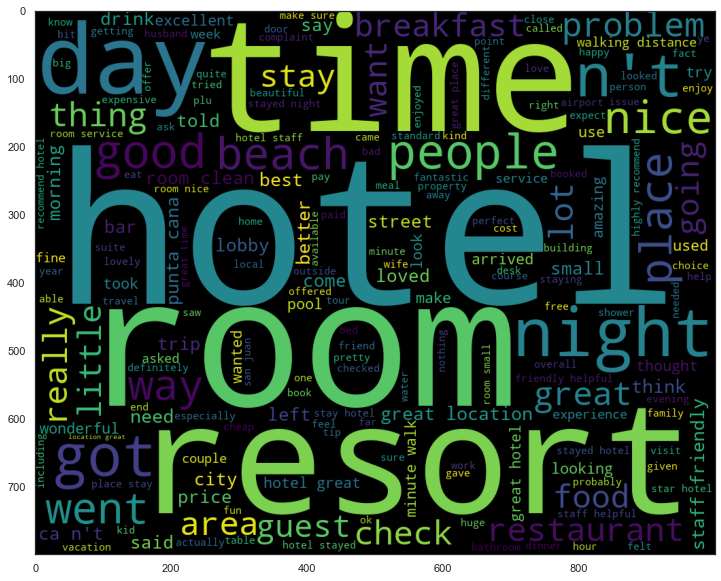

In [49]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

In [41]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [42]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",1
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi re

# 6. Creating our model

In [43]:
from sklearn.model_selection import train_test_split
X= df['Review_stemming']
Y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size=0.25, stratify=Y)

# Vectorization(Tfidf)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

# A. Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr.predict(X_test_tfidf)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,y_pred_tfidf))
print(accuracy_score(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))

[[ 440  364]
 [  62 4257]]
0.9168455982822565
              precision    recall  f1-score   support

           0       0.88      0.55      0.67       804
           1       0.92      0.99      0.95      4319

    accuracy                           0.92      5123
   macro avg       0.90      0.77      0.81      5123
weighted avg       0.91      0.92      0.91      5123



# B. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 274  530]
 [  47 4272]]
              precision    recall  f1-score   support

           0       0.85      0.34      0.49       804
           1       0.89      0.99      0.94      4319

    accuracy                           0.89      5123
   macro avg       0.87      0.66      0.71      5123
weighted avg       0.88      0.89      0.87      5123

0.8873706812414601


# C.Naive Bayes

In [50]:
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
y_pred  =  classifier.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 590  214]
 [ 673 3646]]
              precision    recall  f1-score   support

           0       0.47      0.73      0.57       804
           1       0.94      0.84      0.89      4319

    accuracy                           0.83      5123
   macro avg       0.71      0.79      0.73      5123
weighted avg       0.87      0.83      0.84      5123

0.8268592621510833


# Bag of words

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bag= vectorizer.fit_transform(X_train.values)
X_test_bag= vectorizer.transform(X_test.values)

# A. Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_bag, y_train)
y_pred_bag = lr.predict(X_test_bag)

In [54]:
print(confusion_matrix(y_test,y_pred_bag))
print(accuracy_score(y_test,y_pred_bag))
print(classification_report(y_test,y_pred_bag))

[[ 547  257]
 [ 168 4151]]
0.9170407964083545
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       804
           1       0.94      0.96      0.95      4319

    accuracy                           0.92      5123
   macro avg       0.85      0.82      0.84      5123
weighted avg       0.91      0.92      0.92      5123



# B. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_bag,y_train)
y_pred = clf.predict(X_test_bag)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 188  616]
 [  35 4284]]
              precision    recall  f1-score   support

           0       0.84      0.23      0.37       804
           1       0.87      0.99      0.93      4319

    accuracy                           0.87      5123
   macro avg       0.86      0.61      0.65      5123
weighted avg       0.87      0.87      0.84      5123

0.8729260199102089


# C. Naive Bayes

In [56]:
X_train_bag = X_train_bag.todense()
X_test_bag = X_test_bag.todense()

In [57]:
y_pred  =  classifier.fit(X_train_bag,y_train).predict(X_test_bag)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 305  499]
 [1272 3047]]
              precision    recall  f1-score   support

           0       0.19      0.38      0.26       804
           1       0.86      0.71      0.77      4319

    accuracy                           0.65      5123
   macro avg       0.53      0.54      0.52      5123
weighted avg       0.75      0.65      0.69      5123

0.6543041186804607


# Hence, After the prediction from diffrent type of algorithm, i concluded that the Logistic regression gives maximum accuracy with both 'Bag of words' and 'tfidf'. Still if we compare both of them we found that  'Bag of words' slightly more accurate then 'tfidf'.
# Naive Bayes with 'Bag of words' gives lowest accuracy.